In [1]:
from agent import Agent

agent = Agent(model_type="groq", prompt="Be a helpful assistant", tools=None)

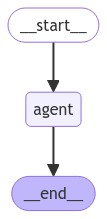

In [2]:
from IPython.display import Image, display

try:
    display(Image(agent.graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [3]:
agent.invoke([{"role": "user", "content": "What is the capital of the moon?"}])

[HumanMessage(content='What is the capital of the moon?', id='2bb2bb91-821b-439c-98f8-4b6db936df52'),
 AIMessage(content="There is no capital city on the moon. The moon is a natural satellite that orbits the Earth, and it does not have a government or a permanent human settlement. While there have been several manned missions to the moon as part of NASA's Apollo program, no city or settlement has been established on the moon.\n\nHowever, there are plans to return humans to the moon in the near future, with NASA's Artemis program aiming to establish a sustainable presence on the lunar surface by the 2020s. But for now, there is no capital city on the moon.", response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 47, 'total_tokens': 162, 'completion_time': 0.153333333, 'prompt_time': 0.011953406, 'queue_time': 0.6820622220000001, 'total_time': 0.165286739}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9cb648b966', 'finish_reason': 'stop', 'logpro